# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
#IMPORTANDO TODAS AS BIBILIOTECAS QUE SERAO USADAS.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
#IMPORTANDO O ARQUIVO CSV.

sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


## Antes de tudo, realizarei a limpeza dos dados e selecionar apenas os dados que serão relevantes para essa análise.

In [5]:
#Usarei as colunas de dados relevantes para analise.

sinasc_1 = sinasc[['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT', 'DTNASC', 'SEXO', 'munResNome', 'PESO']]

In [6]:
#A base de dados apresenta 27.028 linhas em 8 colunas.

sinasc_1.shape

(27028, 8)

In [7]:
#Caso remova os dados faltantes ira restar apenas ~30% da base de dados.
#A maior parte dessa diminuição está relacionada à coluna IDADEPAI que apresenta 7.607 linhas de dados.

sinasc_1.dropna().shape

(7388, 8)

In [8]:
sinasc_1['IDADEPAI'].count()

np.int64(7607)

In [9]:
sinasc = sinasc_1.dropna()

In [11]:
sinasc = sinasc_1.dropna()

## Após a limpeza dos dados, darei inicio a tarefa.

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [27]:
#Usando o groupby como index o munResNome, IDADEMAE e IDADEPAI. Depois uso o método mean para calcular a média das idades de ambos.

sinasc.groupby(by='munResNome')[['IDADEMAE', 
                                     'IDADEPAI']].agg({'IDADEMAE':[('Média','mean')],
                                                       'IDADEPAI':[('Média','mean')]})

,IDADEMAE,IDADEPAI
,Média,Média
munResNome,,
Alta Floresta D'Oeste,25.846405,29.535948
Alto Alegre dos Parecis,24.575758,29.128788
Alto Paraíso,23.400000,29.200000
Alvorada D'Oeste,26.825243,30.757282
Ariquemes,29.153846,33.153846
Buritis,25.266667,32.200000
Cabixi,32.166667,34.333333
Cacaulândia,31.000000,36.333333


<Axes: xlabel='munResNome'>

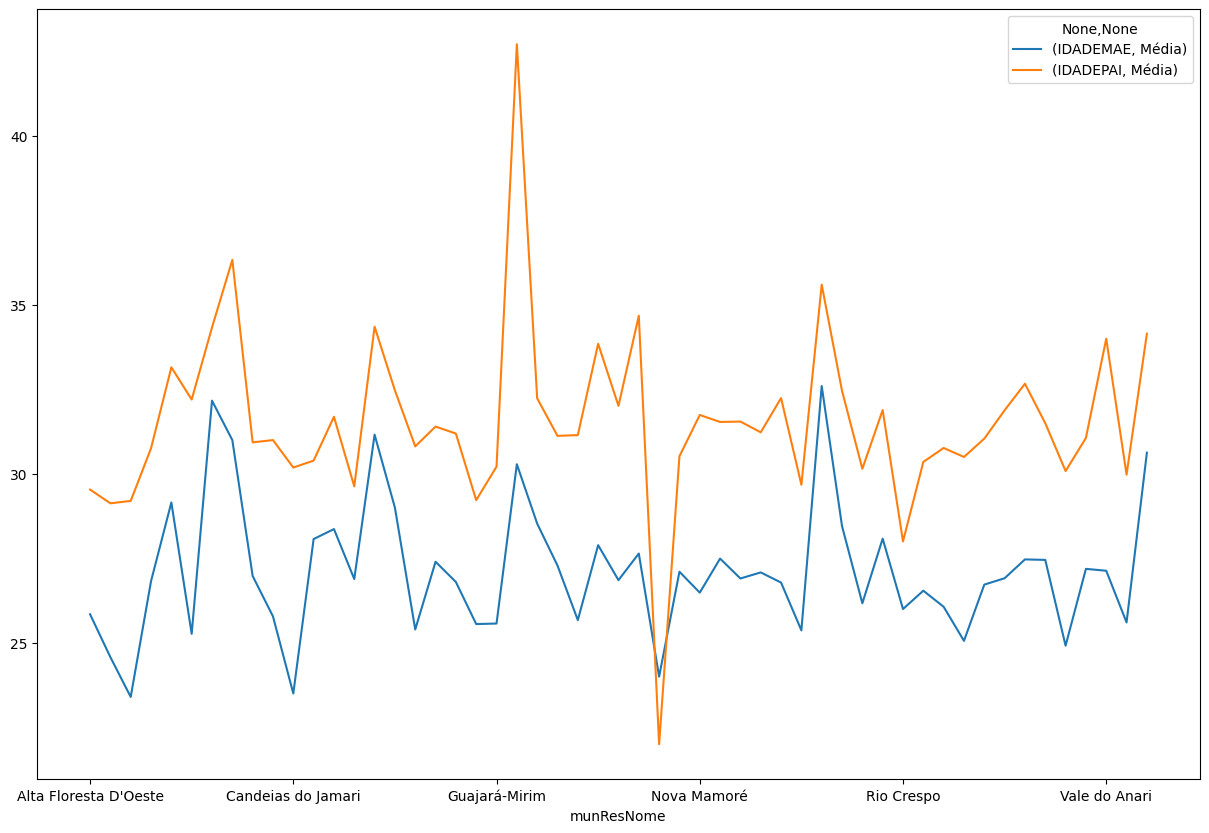

In [21]:
# Analise das médias das idades das mães e dos pais. Observa-se que a idade média dos pais é superior à idade média das mães.
sinasc.groupby(by='munResNome')[['IDADEMAE', 
                                     'IDADEPAI']].agg({'IDADEMAE':[('Média','mean')],
                                                       'IDADEPAI':[('Média','mean')]}).plot(figsize=[15, 10])

In [25]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [28]:
#Fiz um filtro na coluna das datas para o dia do meu aniversário, 20 de novembro.

sinasc_nasc = sinasc[sinasc['DTNASC']=='2019-11-20']

In [29]:
#Agrupei os dados usando o groupby e calculei a média. Utilizei o unstack para separa o SEXO em duas colunas.

sinasc_nasc.groupby(['DTNASC', 'SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
DTNASC,,
2019-11-20,3315.666667,3451.666667


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [31]:
#Para verificar o município que apresentou menos RN em 2019, usei o metodo groupby nos municipios, e fiz uma contagem do SEXO.

# O município com menos bebes nascidos em 2019 foi Rio Crespo, com apenas 01 RN.

sinasc.groupby('munResNome')['SEXO'].count().sort_values()

munResNome
Município ignorado - RO         1
Rio Crespo                      1
Pimenteiras do Oeste            5
Alto Paraíso                    5
Cabixi                          6
Cacaulândia                     6
Itapuã do Oeste                 7
Governador Jorge Teixeira       9
Cujubim                        10
Theobroma                      12
Ariquemes                      13
Guajará-Mirim                  14
Vale do Anari                  15
Candeias do Jamari             16
Corumbiara                     17
Campo Novo de Rondônia         23
Chupinguaia                    27
Castanheiras                   28
Monte Negro                    28
Colorado do Oeste              31
São Francisco do Guaporé       34
Seringueiras                   34
Nova Mamoré                    35
Primavera de Rondônia          36
Parecis                        37
Costa Marques                  43
Vale do Paraíso                43
Teixeirópolis                  44
Buritis                        45
São

In [32]:
# Para facilitar a análise, filtrei os dados para Rio Crespo e depois usei o groupby.

sinasc_mun = sinasc[sinasc['munResNome'] == 'Rio Crespo']

In [37]:
# Usando o agg eu calculo a média, o máximo e o mínimo.
# Como esse município só possui um valor, a média, o máximo e o mínimo são iguais.

sinasc_mun.groupby(by='munResNome')[['IDADEMAE', 'IDADEPAI']].agg(['mean', 'max', 'min'])

IDADEMAE         IDADEPAI            
               mean max min     mean   max   min
munResNome                                      
Rio Crespo     26.0  26  26     28.0  28.0  28.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [38]:
#Iniciei filtrando os dados para o mês de novembro de 2019.

sinasc_marco = sinasc[(sinasc['DTNASC'] >= '2019-11-01') & (sinasc['DTNASC'] <= '2019-11-30')]

In [39]:
#Usando o groupby em ordem decrescente para saber qual o município com mais bebês no qual obrivemos o municipio de Ji-Paraná.

sinasc_marco.groupby('munResNome')['SEXO'].count().sort_values(ascending=False)

munResNome
Ji-Paraná                   87
Cacoal                      83
Rolim de Moura              81
Pimenta Bueno               44
Porto Velho                 39
Espigão D'Oeste             31
Ouro Preto do Oeste         29
Alta Floresta D'Oeste       29
Presidente Médici           15
Vilhena                     13
Alvorada D'Oeste             9
Urupá                        9
Jaru                         9
Nova União                   8
São Francisco do Guaporé     8
Alto Alegre dos Parecis      8
Novo Horizonte do Oeste      7
Ministro Andreazza           6
São Miguel do Guaporé        6
Santa Luzia D'Oeste          5
Nova Brasilândia D'Oeste     5
Cerejeiras                   5
Colorado do Oeste            5
Vale do Paraíso              4
Chupinguaia                  4
Nova Mamoré                  3
Parecis                      3
Seringueiras                 3
Costa Marques                3
Primavera de Rondônia        2
Machadinho D'Oeste           2
Castanheiras                

In [40]:
#Relizei o filtro pelo município para facilitar a análise.

sinasc_mun_1 = sinasc_marco[sinasc_marco['munResNome'] == 'Ji-Paraná']

In [41]:
#Aplicando o groupby e o agg para ver os dados.
#Observamos que a média é menor que 1.

sinasc_mun_1.groupby('munResNome')['QTDFILVIVO'].agg(['mean', 'max', 'min'])

,mean,max,min
munResNome,,,
Ji-Paraná,0.804598,4.0,0.0


In [42]:
#Para determinar qual das hipoteses levantadas faz mais sentido, rodei novamente os blocos de código adicionando o QTDFILMORT.
#Como a média deu um valor muito próximo de zero, podemos dizer que grande parte de mulheres são mães de primeira viagem.

sinasc_mun_1.groupby('munResNome')['QTDFILMORT'].agg(['mean', 'max', 'min'])

,mean,max,min
munResNome,,,
Ji-Paraná,0.218391,2.0,0.0


In [43]:
#Através do groupby e o agg foi calculada a média, o máximo e o mínimo da idade dos pais deste município.
#Tanto o máximo quanto o mínimo estão fora do intervalo.

sinasc_mun_1.groupby('munResNome')['IDADEPAI'].agg(['mean', 'max', 'min', 'std'])

,mean,max,min,std
munResNome,,,,
Ji-Paraná,31.275862,57.0,17.0,7.945585


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [46]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [47]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')